# atomman.lammps.run(lammps_command, script_name, mpi_command=None)

- - -

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Office of Data and Informatics, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2016-09-02

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 
 
- - -

## Introduction

The run function executes a LAMMPS simulation with a supplied input script. This function runs LAMMPS as a subproces making it possible to use any working LAMMPS (and MPI) executables available to you. The standard screen output is automatically parsed using the [log_extract](atomman.lammps.log_extract.ipynb) function, and the resulting [DataModelDict](https://github.com/usnistgov/DataModelDict) is returned. Any errors issued by LAMMPS are passed forward as Python errors.

Arguments:

- __lammps_command__ -- a string or list of terms giving the LAMMPS executable to use and any options (except for the input file).

- __script_name__ -- name of the LAMMPS input script file name to use.

- __ mpi_command__ -- optional string or list of terms giving the MPI executable to use and any options. If not given, LAMMPS will run serially.


The underlying code can be found in [atomman/lammps/normalize.py](../../atomman/lammps/normalize.py).

## Demonstration

In [1]:
import time

import matplotlib.pyplot as plt
%matplotlib inline

#atomman imports
import atomman.lammps as lmp

### Run in serial

Define your LAMMPS command to use

In [2]:
lammps_command = 'lmp_serial'

Create a simple LAMMPS script

In [3]:
with open('demo.in', 'w') as f:
    f.write("""
#Simple demonstration LAMMPS script

units metal
atom_style atomic
boundary p p p 

lattice fcc 3.52 origin 0.100000 0.100000 0.100000 
        
region box block 0 10 0 10 0 10
create_box 1 box
create_atoms 1 box

mass 1 58.71

pair_style lj/cut 6
pair_coeff 1 1 0.5408 2.272

velocity all create 100 2987532

thermo 100
thermo_style custom step pe temp press lx ly lz

timestep 0.01

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 10000
""")

Run

In [4]:
start = time.time()
results = lmp.run(lammps_command, 'demo.in')
end = time.time()
serial_run_time = end-start

print "Serial simulation took", serial_run_time, "seconds."

Serial simulation took 38.4440000057 seconds.


Plot Lx,Ly,Lz vs Step

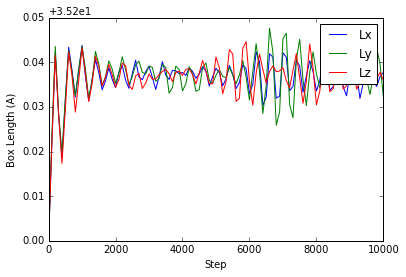

In [5]:
steps = results.finds('Step')
lx = results.finds('Lx')
ly = results.finds('Ly')
lz = results.finds('Lz')

plt.plot(steps, lx, label='Lx')
plt.plot(steps, ly, label='Ly')
plt.plot(steps, lz, label='Lz')

plt.legend()
plt.xlabel('Step')
plt.ylabel('Box Length (A)')
plt.show()

### Run with multiple processors

Here, we run the same simulation in parallel by supplying an mpi_command.

In [6]:
lammps_command = 'lmp_mpi'
mpi_command = 'mpiexec -localonly 4'

In [7]:
start = time.time()
results = lmp.run(lammps_command, 'demo.in', mpi_command)
end = time.time()
parallel_run_time = end-start

print "Serial simulation took", serial_run_time, "seconds."
print "Parallel simulation took", parallel_run_time, "seconds"

Serial simulation took 38.4440000057 seconds.
Parallel simulation took 12.1789999008 seconds


### Get LAMMPS error

The run function passes any errors raised by LAMMPS to become errors in Python. This allows for easy debugging in Python.

Here, we create the same LAMMPS script above but misspell 'origin' in the lattice command.

In [8]:
with open('demo.in', 'w') as f:
    f.write("""
#Simple demonstration LAMMPS script

units metal
atom_style atomic
boundary p p p 

lattice fcc 3.52 orign 0.100000 0.100000 0.100000 
        
region box block 0 10 0 10 0 10
create_box 1 box
create_atoms 1 box

mass 1 58.71

pair_style lj/cut 6
pair_coeff 1 1 0.5408 2.272

velocity all create 100 2987532

thermo 100
thermo_style custom step pe temp press lx ly lz

timestep 0.01

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 10000
""")

Running and catching the error

In [9]:
try:
    results = lmp.run(lammps_command, 'demo.in', mpi_command)
except Exception, e:
    print e

Invalid LAMMPS input: 
ERROR: Illegal lattice command (../lattice.cpp:218)


File cleanup

In [10]:
import os
os.remove('demo.in')
os.remove('log.lammps')

- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)